# A bout the data :
We make scraping the data from the Aribnb web site from suadi the data have sevene columns :
- url: the url of the items that have all the data 
- name: the name of department
- header: the loaction of the place
- beds: the numbers of the beds in the departments
- bedrooms : the numbers of the rooms in departments
- date_range: how many day you will be stay in the departments
- price:  the price of staying in  the department
- rating: the rating of the people a bout the place 

**import libraries**

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

**Read csv file** 

In [45]:
data = pd.read_csv("/kaggle/input/suida-arabia/saudi_arabia.csv")

**Show the five first rows in the data**

In [46]:
data.head()

,Unnamed: 0,name,header,beds,bedrooms,date_range,price,rating
0,0,Saleh's Cottage Saleh Cottage,Cabin in Samha,Saleh's Cottage Saleh Cottage,"6 beds, · 2 bedrooms",Nov 12 – 17,$266,NaN
1,1,Cypress cottage,Hut in Tabab,Cypress cottage,"3 beds, · 2 bedrooms",May 1 – 6,"$1,066",NaN
2,2,Qishla,Apartment in Riyadh,Qishla,"2 beds, · 2 bedrooms",Dec 15 – 20,$162,5.0 (3)
3,3,Exhibitor NeighborhoodThe Green (Self-entry),Chalet in Riyadh,Exhibitor NeighborhoodThe Green (Self-entry),Verified fast wifi,Nov 12 – 17,$205,4.86 (177)
4,4,Mabaat - Al Narjis - 424,Apartment in Riyadh,Mabaat - Al Narjis - 424,"3 beds, · 2 bedrooms",Nov 12 – 17,$244,4.28 (40)


**shape of the data**

In [47]:
data.shape

(3600, 8)

**Show how many missing values in the columns** 

In [48]:
data.isnull().sum()

Unnamed: 0      0
name            0
header          0
beds            0
bedrooms        0
date_range      0
price         854
rating         46
dtype: int64

**Drop all the none value in the rows**

In [49]:
data.dropna(inplace=True)

**Here we can extract new features from bedrooms column the first numbers of the beds and the second the numbers of the rooms and others featrues** 

In [50]:
# Extract number of beds and number of bedrooms
data[['num_beds', 'num_bedrooms']] = data['bedrooms'].str.extract('(\d+) beds.*?(\d+) bedrooms').fillna(1)

**Fix the price values and delete the Doller sign and convert it to float type** 

In [51]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data['price'].head(3)

2    162.0
3    205.0
4    244.0
Name: price, dtype: float64

**This column has to value the first number represent the rating of place and the second represent the numbers of commints** 

In [52]:
data['rating'].head(2)

2       5.0 (3)
3    4.86 (177)
Name: rating, dtype: object

In [53]:
# Assuming your DataFrame is named 'df' and the column is 'rating_and_comments'
data['ratingg'] = data['rating'].str.extract(r'(\d+\.\d+)').astype(float)
data['num_comments'] = data['rating'].str.extract(r'\((\d+)\)').astype(float)

# Display the resulting DataFrame
print(data[['ratingg', 'num_comments']].head(2))

   ratingg  num_comments
2     5.00           3.0
3     4.86         177.0


**Drop unusefull columns after extracting of the new features** 

In [54]:
data = data.drop(columns=['rating' , 'bedrooms' , 'date_range' ,'Unnamed: 0' ]) # drop the columns

**Rename columns header**

In [55]:
# Rename columns
data.rename(columns={'header': 'location'}, inplace=True)

**How many locatioon we have ?**

In [56]:
data['location'].value_counts()

location
Apartment in Riyadh                         1147
Apartment in Jeddah                          778
Condo in Riyadh                              276
Condo in Jeddah                              231
Home in Riyadh                               182
Apartment in Makkah                           31
Cabin in Jeddah                                7
Apartment in King Abdullah Economic City       5
Chalet in Riyadh                               5
Apartment in Mecca                             4
Apartment in الرياض                            3
Villa in Riyadh                                2
Villa in Dhahran                               2
Chalet in Taif                                 1
Chalet in Mecca                                1
Townhouse in Riyadh                            1
Cottage in Umluj                               1
Tiny home in Makkah Province                   1
Hut in Taif                                    1
Room in Riyadh                                 1
Loft in Jed

This problem called **Consistency**: Renaming the city names ensures that similar locations are represented consistently. 

**City names mapping**

In [57]:
import pandas as pd
import re
# City names
# City names mapping
mapping = { 'Apartment in Riyadh': "Riyadh", 'Apartment in Jeddah': "Jeddah", 'Condo in Riyadh': "Riyadh",
           'Apartment in Makkah': "Makkah", 'Condo in Jeddah': "Jeddah", 'Home in Riyadh': "Riyadh",
           'Apartment in King Abdullah Economic City': "King Abdullah", 'Apartment in الرياض': "Riyadh",
           'Hotel in Makkah': "Makkah", 'Apartment in  Muhammadiyah, Jeddah': "Jeddah",
           'Apartment in Mecca': "Makkah", 'Chalet in Riyadh': "Riyadh", 'Condo in Makkah': "Makkah",
           'Room in Riyadh': "Riyadh", 'Home in Jeddah': "Jeddah", 'Villa in Riyadh': "Riyadh",
           'Hut in Jeddah': "Jeddah", 'Cabin in Jeddah': "Jeddah", 'Hut in Taif': "others",
           'Apartment in Diriyah': "others", 'Guest suite in Riyadh': "Riyadh", 'Loft in Jeddah': "Jeddah",
           'Condo in Al Khobar': "others", 'Chalet in Duba': "others", 'Chalet in Mecca': "Makkah",
           'Vacation home in Riyadh': "Riyadh", 'Tiny home in Ragal Almaa': "others", 'Loft in Riyadh City': "Riyadh",
           'Place to stay in Riyadh': "Riyadh", 'Farm stay in Jalajil': "others", 'Barn in Riyadh': "Riyadh",
           'Ranch in AlUla': "others" , 'Cabin in At Taif': "others", 'Villa in Jeddah': "Jeddah",
           'Guesthouse in Makkah': "Makkah"}

# Apply mapping to the 'city' column
data['location'] = data['location'].map(mapping)

**Count the occurrences of each city**

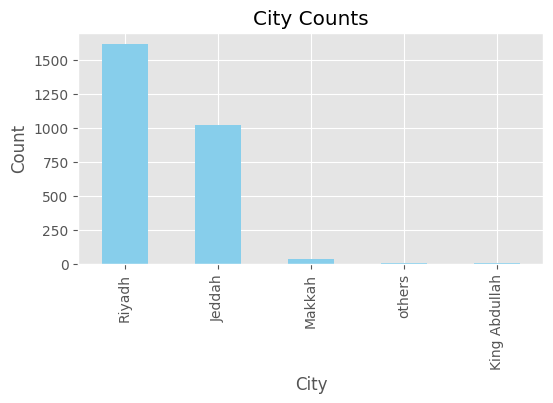

In [58]:
# Count the occurrences of each city
city_counts = data['location'].value_counts()

# Plotting
plt.figure(figsize=(6, 3))
city_counts.plot(kind='bar', color='skyblue')
plt.title('City Counts')
plt.xlabel('City')
plt.ylabel('Count')

# Display the plot
plt.show()

In [59]:
data.columns

Index(['name', 'location', 'beds', 'price', 'num_beds', 'num_bedrooms',
       'ratingg', 'num_comments'],
      dtype='object')

In [60]:
data2 = data.drop(columns=[  'beds'  , 'name'])

**show the types of the columns**

In [61]:
data2.dtypes

location         object
price           float64
num_beds         object
num_bedrooms     object
ratingg         float64
num_comments    float64
dtype: object

In [62]:
data2.dropna(inplace=True)

* Once you have **converted** the **data types**, you can then enter the data into the model. 
* The **model** will then be able to learn the **relationships** between the data and make more **accurate predictions**.

In [63]:
# Convert columns to recommended data types
data2['location'] = data2['location'].astype(str)
data2['price'] = data2['price'].astype(float)
data2['num_beds'] = data2['num_beds'].astype(int)
data2['num_bedrooms'] = data2['num_bedrooms'].astype(int)
data2['ratingg'] = data2['ratingg'].astype(float)
data2['num_comments'] = data2['num_comments'].astype(int)

* Describe method to display summary statistics (count, mean, std, min, 25%, 50%, 75%, and max) for numeric columns.
* It also shows the mean and median for specific columns.

In [64]:
data2.describe()

,price,num_beds,num_bedrooms,ratingg,num_comments
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,156.085554,3.043478,2.135577,4.909719,21.863955
std,97.589496,1.381922,0.889783,0.128036,17.694838
min,48.000000,1.000000,1.000000,3.250000,3.000000
25%,104.000000,2.000000,2.000000,4.850000,10.000000
50%,133.000000,3.000000,2.000000,5.000000,16.000000
75%,158.000000,4.000000,2.000000,5.000000,33.000000
max,447.000000,8.000000,5.000000,5.000000,178.000000


# analysis and recommendations
* **Price**:
    * **Analysis**: The mean price is $156.54  with a standard deviation of  $97.80. The minimum price is $48, and the maximum is $448.
    * **Recommendation**:
            - Check for outliers in the price column.
            - You can use box plots or other visualizations to identify extreme values. 
            - you might choose to remove or adjust outliers.
        
* **num_comments**:
    * **Analysis**: The mean number of comments is approximately 21.81 with a standard deviation of 17.69. The minimum number of comments is 3, and the maximum is 178.
    * **Recommendation**:
                - Check for outliers in the number of comments.
                - If there are properties with an exceptionally high number of comments, investigate whether these are legitimate data points or if there are any data entry errors

* **function to make plot and remove outliers**

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the boundaries for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_no_outliers

# Function to create box plot
def plot_box_plots(df, column):
    df_no_outliers = remove_outliers(df, column)  # Define df_no_outliers here
    
    plt.figure(figsize=(14, 6))

    # Before removing outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} (Before Removing Outliers)')

    # After removing outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_no_outliers[column])
    plt.title(f'Box Plot of {column} (After Removing Outliers)')

    plt.show()


* **Remove outliers in the num_comments**

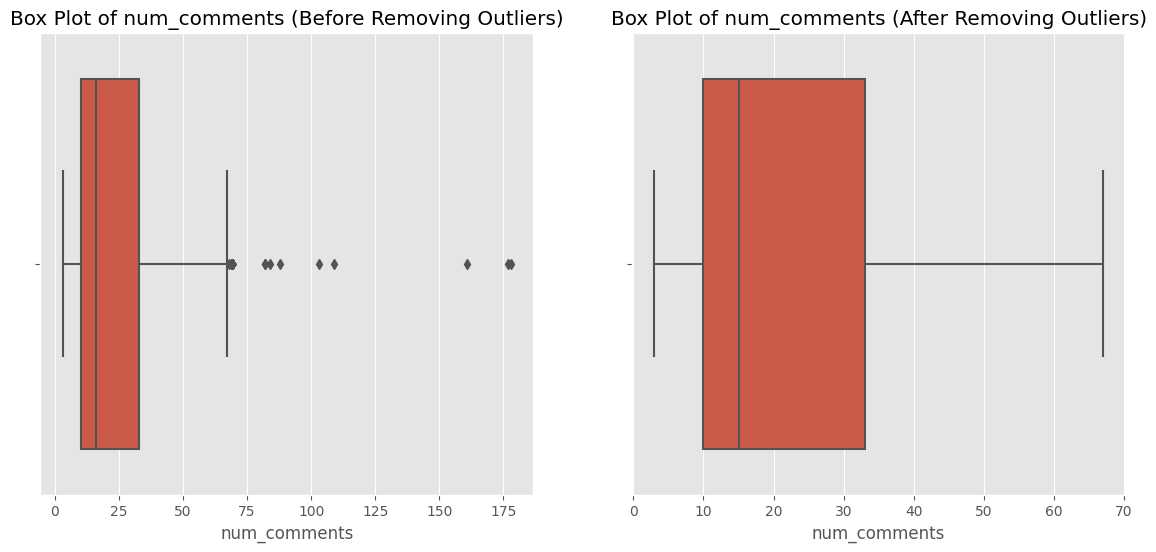

In [66]:
# Create and display the box plots before and after removing outliers
plot_box_plots(data2, 'num_comments')
# Remove outliers
data3 = remove_outliers(data2, 'num_comments')


* **remove outliers from price**

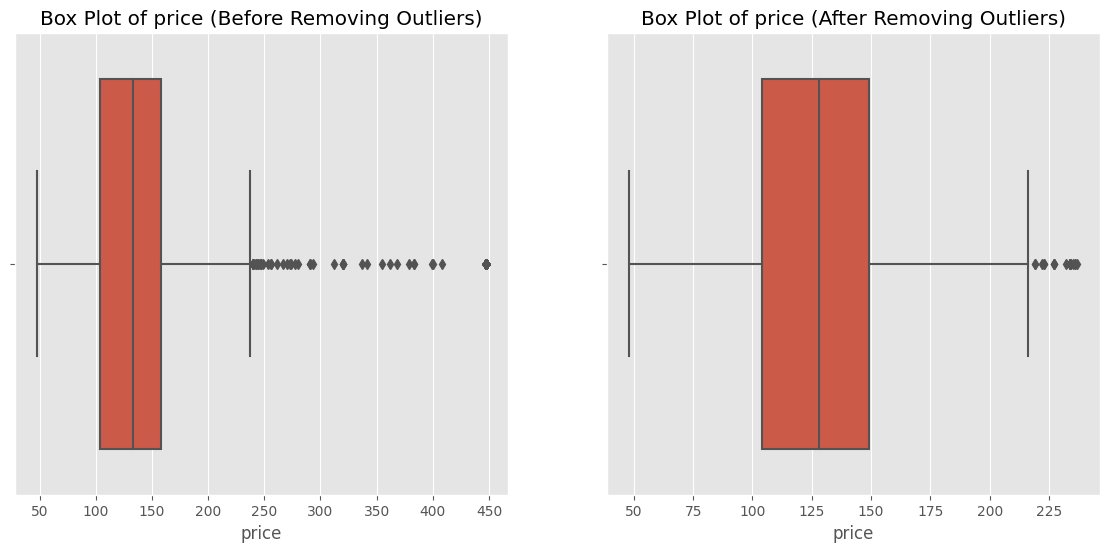

In [67]:
# Create and display the box plots before and after removing outliers
plot_box_plots(data3, 'price')
# Remove outliers
data4 = remove_outliers(data3, 'price')


* **Most famous city in Sudia Arabia**

**we looking teh plot we sea the Riyadh has the heghest price**

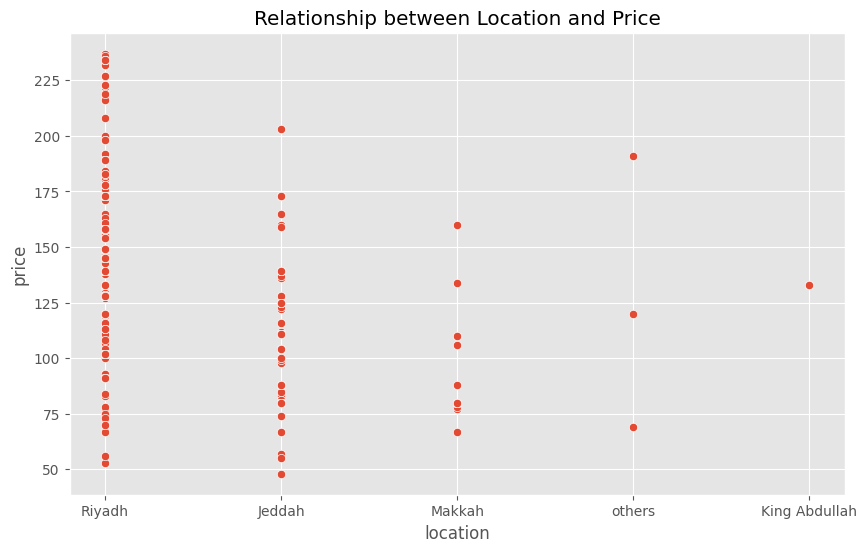

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='location', y='price', data=data4)
plt.title('Relationship between Location and Price')
plt.show()

### [Distribution of House priceing]()

/tmp/ipykernel_47/1307547860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['price'])


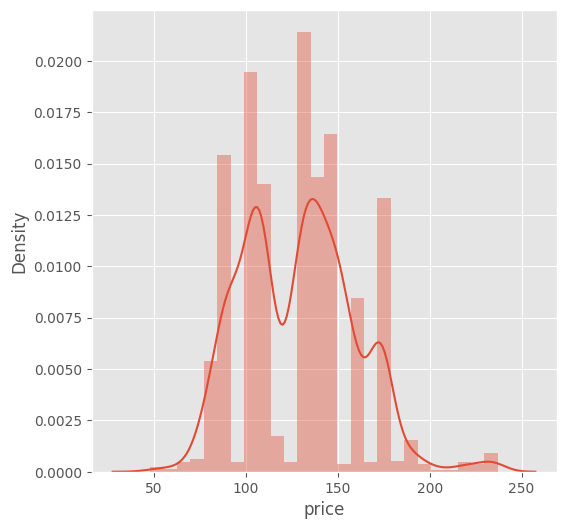

In [69]:
plt.figure(figsize=(6,6))
sns.distplot(data4['price'])
plt.show()

* **make encoded for categorical columns**

In [70]:
data5_encoded = pd.get_dummies(data4, columns=['location'], prefix='location')
data5_encoded

,price,num_beds,num_bedrooms,ratingg,num_comments,location_Jeddah,location_King Abdullah,location_Makkah,location_Riyadh,location_others
2,162.0,2,2,5.00,3,False,False,False,True,False
7,176.0,2,2,4.93,67,False,False,False,True,False
9,105.0,3,2,4.88,33,False,False,False,True,False
15,57.0,1,1,4.90,21,True,False,False,False,False
17,115.0,3,2,5.00,5,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
3592,139.0,4,2,5.00,3,False,False,False,True,False
3594,111.0,5,3,5.00,4,True,False,False,False,False
3595,91.0,3,2,5.00,11,False,False,False,True,False
3598,133.0,3,2,4.81,16,False,False,False,True,False


* **check if there Replace spaces with NaN**

In [71]:
# Replace spaces with NaN
data5_encoded.replace(' ', pd.NA, inplace=True)
# Drop rows with any null values
data5_encoded  = data5_encoded.dropna()
# Display the cleaned DataFrame
print("DataFrame after removing rows with null values or spaces:")
print(data5_encoded)

DataFrame after removing rows with null values or spaces:
      price  num_beds  num_bedrooms  ratingg  num_comments  location_Jeddah  \
2     162.0         2             2     5.00             3            False   
7     176.0         2             2     4.93            67            False   
9     105.0         3             2     4.88            33            False   
15     57.0         1             1     4.90            21             True   
17    115.0         3             2     5.00             5            False   
...     ...       ...           ...      ...           ...              ...   
3592  139.0         4             2     5.00             3            False   
3594  111.0         5             3     5.00             4             True   
3595   91.0         3             2     5.00            11            False   
3598  133.0         3             2     4.81            16            False   
3599  173.0         1             1     5.00            10            Fal

* **convert the value of the encoded columns from True to 1 and False to 0**

In [72]:
# Assuming you have a DataFrame named data5_encoded
data5_encoded[['location_Jeddah', 'location_King Abdullah', 'location_Makkah', 'location_Riyadh', 'location_others']] = data5_encoded[['location_Jeddah', 'location_King Abdullah', 'location_Makkah', 'location_Riyadh', 'location_others']].astype(int)

* **convert the type of the num beds and num bedrooms**

In [73]:
data5_encoded['num_beds'] = data5_encoded['num_beds'].astype(int)
data5_encoded['num_bedrooms'] = data5_encoded['num_bedrooms'].astype(int)

**show the corrlation between the columns**

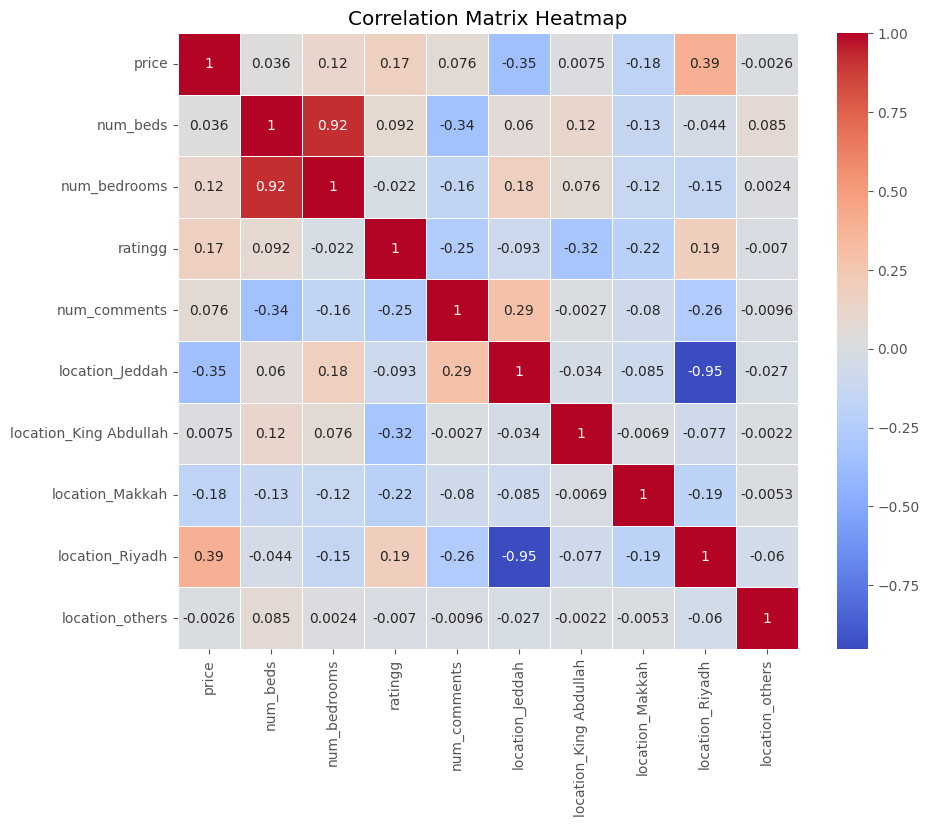

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a correlation matrix
correlation_matrix = data5_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [75]:
X = data5_encoded.drop(['price'] , axis='columns')
X.head(3)

,num_beds,num_bedrooms,ratingg,num_comments,location_Jeddah,location_King Abdullah,location_Makkah,location_Riyadh,location_others
2,2,2,5.00,3,0,0,0,1,0
7,2,2,4.93,67,0,0,0,1,0
9,3,2,4.88,33,0,0,0,1,0


In [76]:
y = data5_encoded.price
y.head(3)

2    162.0
7    176.0
9    105.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,  random_state=42)

# Evaluate model  performance

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Train K-Nearest Neighbors model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Function to evaluate model performance
def evaluate_model(model, predictions, y_true):
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    print(f"Mean Squared Error: {mse:.2f}")  # Rounds to 2 decimal places
    print(f"R^2 Score: {r2:.2f}")  # Rounds to 2 decimal places


# Evaluate models
print("Linear Regression:")
evaluate_model(lr_model, lr_predictions, y_test)

print("\nK-Nearest Neighbors:")
evaluate_model(knn_model, knn_predictions, y_test)

print("\nDecision Tree:")
evaluate_model(dt_model, dt_predictions, y_test)

print("\nRandom Forest:")
evaluate_model(rf_model, rf_predictions, y_test)

print("\nXGBoost:")
evaluate_model(xgb_model, xgb_predictions, y_test)

# Create a heatmap for correlation matrix of model predictions
predictions_df = pd.DataFrame({'Linear Regression': lr_predictions,
                                'K-Nearest Neighbors': knn_predictions,
                                'Decision Tree': dt_predictions,
                                'Random Forest': rf_predictions,
                                'XGBoost': xgb_predictions})



Linear Regression:
Mean Squared Error: 635.47
R^2 Score: 0.37

K-Nearest Neighbors:
Mean Squared Error: 158.35
R^2 Score: 0.84

Decision Tree:
Mean Squared Error: 157.18
R^2 Score: 0.84

Random Forest:
Mean Squared Error: 74.56
R^2 Score: 0.93

XGBoost:
Mean Squared Error: 114.75
R^2 Score: 0.89


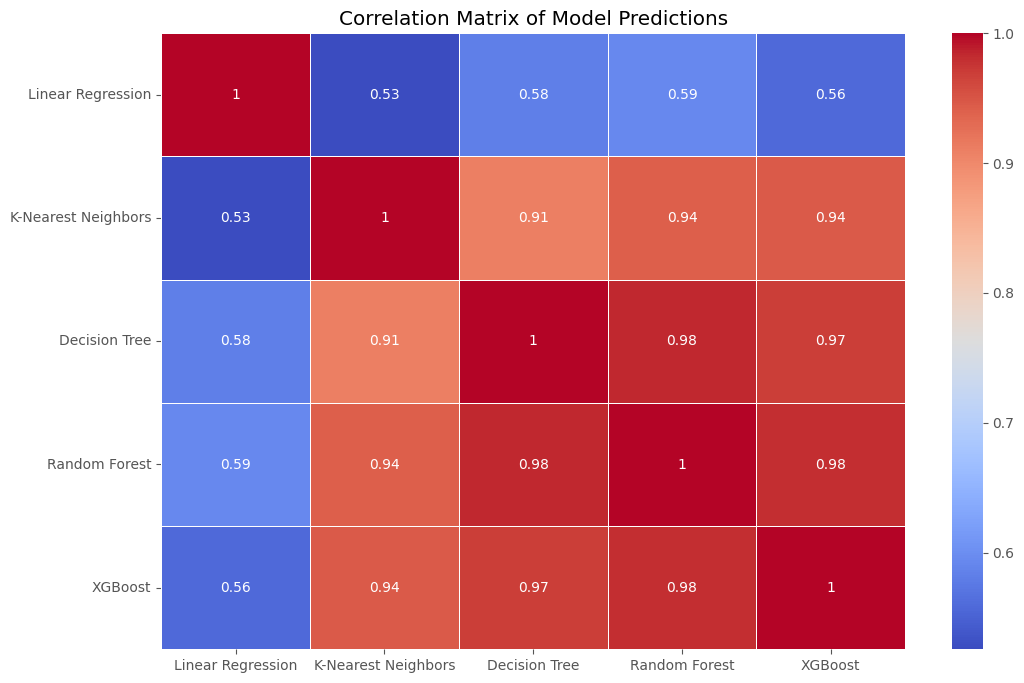

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(predictions_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Model Predictions')
plt.show()


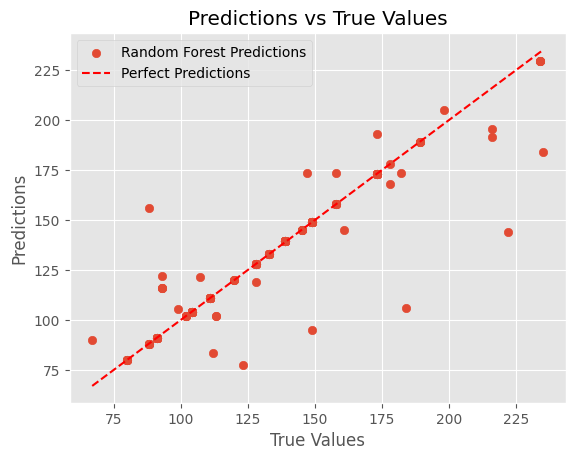

In [81]:
# Scatter plot
plt.scatter(y_test, rf_predictions, label='Random Forest Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Line of perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

plt.legend()
plt.title('Predictions vs True Values')
plt.show()


# Conclusion

The results of our regression models support our hypothesis. The number of bedrooms, the number of beds, and the location significantly influence condo prices in Saudi Arabia. The Random Forest model, which takes into account these features, provided the most accurate predictions. Adjustments and enhancements to the model, considering outliers and additional features, could further improve its performance.
